In [1]:
import xarray as xr

ruta_nc = r"C:\Users\Lab\Documents\imagenes_S2\S2B_MSI_2025_04_19_17_47_43_T13QCF_L3_ChlMDN_10m.nc"

# Abre el archivo NetCDF
ds = xr.open_dataset(ruta_nc)

# Muestra su contenido
ds

<xarray.Dataset> Size: 185MB
Dimensions:    (longitude: 5369, latitude: 4316)
Coordinates:
  * longitude  (longitude) float64 43kB -106.6 -106.6 -106.6 ... -106.1 -106.1
  * latitude   (latitude) float64 35kB 23.4 23.4 23.4 23.4 ... 23.0 23.0 23.0
Data variables:
    chl_mdn    (latitude, longitude) float32 93MB ...
    l2_flags   (latitude, longitude) float32 93MB ...
    crs        int32 4B ...
Attributes: (12/33)
    Conventions:          CF-1.4
    created_by:           R packages ncdf4 and terra (version 1.7-83)
    date:                 2025-06-09 10:56:24
    id:                   ICML:UNINMAR:S2B.MSI.20250419.T13QCF.10.chlMDN
    title:                Chlorophyll-a concentration in coastal surface wate...
    keywords:             EARTH SCIENCE, OCEANS, OCEAN OPTICS, CHLOROPHYLL, C...
    ...                   ...
    project:              Observatorios costeros del Cambio Global
    source:               Level 1C remote sensing image captured by the MSI s...
    spatialResolution:    10m
    license:              The ownership of the copyright of this digital cont...
    cdm_data_type:        grid
    product_version:      1.1.2

<xarray.Dataset> Size: 185MB
Dimensions:    (longitude: 5369, latitude: 4316)
Coordinates:
  * longitude  (longitude) float64 43kB -106.6 -106.6 -106.6 ... -106.1 -106.1
  * latitude   (latitude) float64 35kB 23.4 23.4 23.4 23.4 ... 23.0 23.0 23.0
Data variables:
    chl_mdn    (latitude, longitude) float32 93MB ...
    l2_flags   (latitude, longitude) float32 93MB ...
    crs        int32 4B ...
Attributes: (12/33)
    Conventions:          CF-1.4
    created_by:           R packages ncdf4 and terra (version 1.7-83)
    date:                 2025-06-09 10:56:24
    id:                   ICML:UNINMAR:S2B.MSI.20250419.T13QCF.10.chlMDN
    title:                Chlorophyll-a concentration in coastal surface wate...
    keywords:             EARTH SCIENCE, OCEANS, OCEAN OPTICS, CHLOROPHYLL, C...
    ...                   ...
    project:              Observatorios costeros del Cambio Global
    source:               Level 1C remote sensing image captured by the MSI s...
    spatialResolut

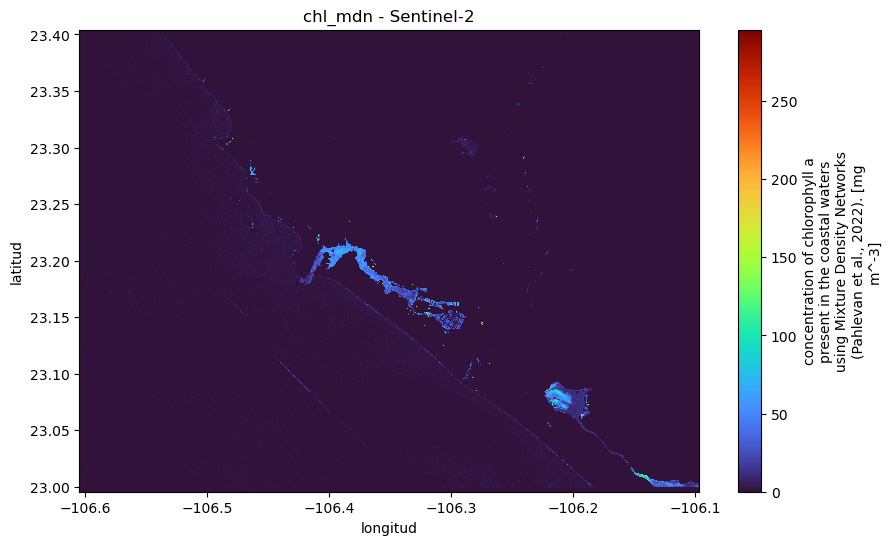

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# Ruta del archivo NetCDF
ruta_nc = r"C:\Users\Lab\Documents\imagenes_S2\S2B_MSI_2025_04_19_17_47_43_T13QCF_L3_ChlMDN_10m.nc"

# Abrir el dataset
ds = xr.open_dataset(ruta_nc)

# Mostrar su estructura (opcional, para saber qué variable graficar)
print(ds)

# Si la variable se llama 'chlor_a', 'chl', 'ChlMDN', etc., ajusta el nombre aquí:
variable = 'chl_mdn'  # <-- cámbiala si tu variable tiene otro nombre

# Graficar la variable seleccionada
plt.figure(figsize=(10, 6))
ds[variable].plot(cmap='turbo')  # puedes probar 'plasma', 'turbo', etc.
plt.title(f"{variable} - Sentinel-2")
plt.xlabel("longitud")
plt.ylabel("latitud")
plt.show()

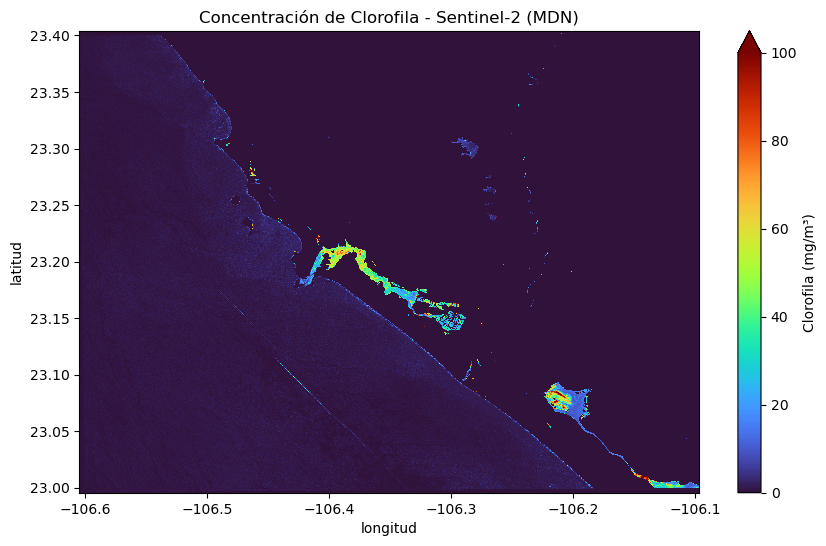

In [6]:
# Abrir el dataset
ds = xr.open_dataset(ruta_nc)

# Nombre de la variable de clorofila (ajústalo según tu archivo)
variable = 'chl_mdn'  

# Definir límites de concentración (ejemplo en mg/m³)
vmin = 0
vmax = 100

# Elegir un colormap (algunos comunes: viridis, turbo, plasma, cmocean_algae)
cmap = 'turbo'

# Crear el gráfico
plt.figure(figsize=(10, 6))
ds[variable].plot(cmap=cmap, vmin=vmin, vmax=vmax, cbar_kwargs={'label': 'Clorofila (mg/m³)'})
plt.title("Concentración de Clorofila - Sentinel-2 (MDN)")
plt.xlabel("longitud")
plt.ylabel("latitud")
plt.show()

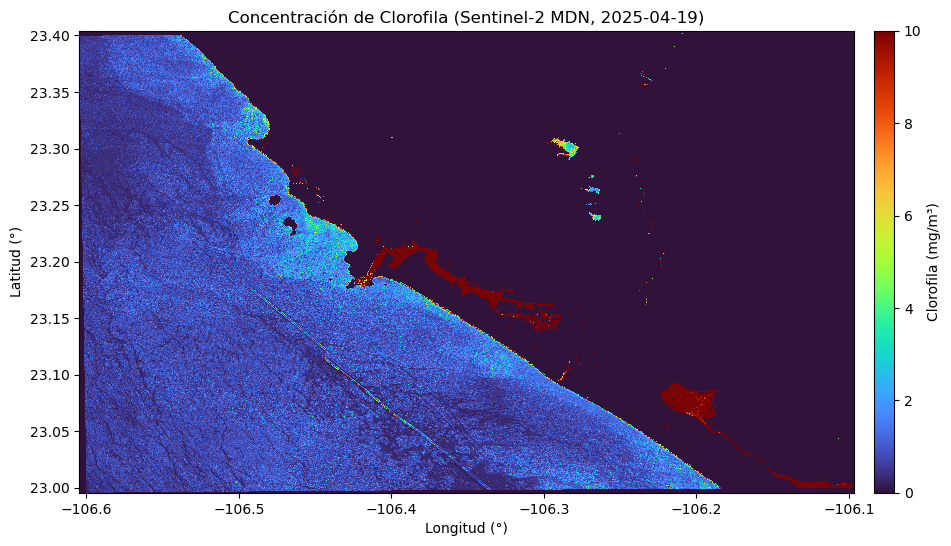

In [9]:
import xarray as xr
import matplotlib.pyplot as plt

# --- Abrir el archivo .nc ---
ruta_nc = r"C:\Users\Lab\Documents\imagenes_S2\S2B_MSI_2025_04_19_17_47_43_T13QCF_L3_ChlMDN_10m.nc"
ds = xr.open_dataset(ruta_nc)

# --- Extraer variable y coordenadas ---
chl = ds['chl_mdn']
lon = ds['longitude']
lat = ds['latitude']

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(10, 6))

# --- Escala de color (ajusta según tus valores) ---
vmin = 0
vmax = 10
cmap = 'turbo'   # otras opciones: 'viridis', 'plasma', 'cmocean.algae'

# --- Graficar con pcolormesh ---
im = ax.pcolormesh(lon, lat, chl, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')

# --- Barra de color personalizada ---
cax = fig.add_axes([ax.get_position().x1 + 0.02,  # desplazamiento a la derecha
                    ax.get_position().y0,
                    0.02,
                    ax.get_position().height])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Clorofila (mg/m³)')

# --- Etiquetas y título ---
ax.set_xlabel('Longitud (°)')
ax.set_ylabel('Latitud (°)')
ax.set_title('Concentración de Clorofila (Sentinel-2 MDN, 2025-04-19)')

plt.show()